In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.cluster import KMeans 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.preprocessing import normalize
from sklearn.metrics import pairwise_distances

import nltk
import string

import matplotlib.pyplot as plt

df1 = pd.read_csv(r'/content/bookData.csv', encoding='mac_roman')
df2 = pd.read_csv(r'/content/votes.csv', encoding='mac_roman')

# Merging data from bookData and votes to analyze trends in categories through the years 
df = df1.merge(df2, left_on='title', right_on='BOOK TITLE')
df.set_index('year')
df

,id,title,year,voyager,pages,BOOK TITLE,F21 CRAIN ALPHARR,F21 CRAIN BODY,F21 CRAIN SWALLOW,S20 CRAIN ALPHARR,S20 CRAIN BODY,S20 CRAIN SWALLOW,S18 CRAIN ALPHARR,S18 CRAIN BODY,S18 CRAIN SWALLOW,F21 MORPH AS ARE,F21 MORPH MIGHT BE,F21 MORPH SHOULD BE,S20 MORPH AS ARE,S20 MORPH MIGHT BE,S20 MORPH SHOULD BE,S18 MORPH AS ARE,S18 MORPH MIGHT BE,S18 MORPH SHOULD BE,Disability,Diverse family structure,LGBTQIA+,Mental illness,None,Racial / Ethnic identity,Religious identity,Socioeconomic status
0,5255,A B See,1973,5533078,128,A B See,86.2,3.4,10.3,0.0,0.0,0.0,0.0,0.0,0.0,75.8,18.2,6.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.5,0.0,0.0,15.0,47.5,12.5,22.5
1,5552,A is for Africa,1993,5847687,32,A is for Africa,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.5,0.0,0.0,0.0,40.0,21.8,23.6
2,3536,A to Zen : a book of Japanese culture,1992,5733108,32,A to Zen : a book of Japanese culture,100.0,0.0,0.0,96.9,3.1,0.0,0.0,0.0,0.0,100.0,0.0,0.0,95.1,1.6,3.3,0.0,0.0,0.0,0.0,4.2,0.0,0.0,0.0,45.8,37.5,12.5
3,5563,ABC / Norbertine v. Bresslern-Roth,1946,7052869,62,ABC / Norbertine v. Bresslern-Roth,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,78.6,14.3,3.6,3.6
4,273,ABC and the Children of Many Nations,1916,5645244,16,ABC and the Children of Many Nations,93.1,3.4,3.4,91.9,8.1,0.0,81.1,17.6,1.4,68.8,6.3,25.0,69.2,12.3,18.5,60.6,1.4,38.0,0.0,8.0,0.0,0.0,0.0,42.0,8.0,42.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90,24,Tom Thumb's alphabet,1836,4840337,40,Tom Thumb's alphabet,100.0,0.0,0.0,96.2,1.9,1.9,88.1,10.2,1.7,100.0,0.0,0.0,78.6,10.7,10.7,58.7,36.5,4.8,0.0,0.0,0.0,0.0,16.7,3.3,13.3,66.7
91,23,Tony Sarg's Alphabet,1926,4769970,64,Tony Sarg's Alphabet,95.7,4.3,0.0,98.1,1.9,0.0,81.5,16.9,1.5,8.0,88.0,4.0,7.1,92.9,0.0,7.0,89.5,3.5,7.1,0.0,0.0,0.0,7.1,40.5,9.5,35.7
92,3530,"Ultimate alphabet, The",1992,5714039,72,"Ultimate alphabet, The",96.2,3.8,0.0,91.1,1.8,7.1,0.0,0.0,0.0,32.3,67.7,0.0,22.6,74.2,3.2,0.0,0.0,0.0,5.7,1.9,0.0,0.0,0.0,34.0,32.1,26.4
93,3538,Wild animal crackers,1930,6203272,60,Wild animal crackers,57.7,42.3,0.0,44.4,50.0,5.6,0.0,0.0,0.0,100.0,0.0,0.0,94.8,5.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0


In [ ]:
df = df.sort_values(by = 'year', ascending=True)
df = df.append(df.sum(numeric_only=True), ignore_index=True)
df

,id,title,year,voyager,pages,BOOK TITLE,F21 CRAIN ALPHARR,F21 CRAIN BODY,F21 CRAIN SWALLOW,S20 CRAIN ALPHARR,S20 CRAIN BODY,S20 CRAIN SWALLOW,S18 CRAIN ALPHARR,S18 CRAIN BODY,S18 CRAIN SWALLOW,F21 MORPH AS ARE,F21 MORPH MIGHT BE,F21 MORPH SHOULD BE,S20 MORPH AS ARE,S20 MORPH MIGHT BE,S20 MORPH SHOULD BE,S18 MORPH AS ARE,S18 MORPH MIGHT BE,S18 MORPH SHOULD BE,Disability,Diverse family structure,LGBTQIA+,Mental illness,None,Racial / Ethnic identity,Religious identity,Socioeconomic status
0,6.0,The alphabet of Goody Two Shoes,1820,4718903,210.0,The alphabet of Goody Two Shoes,87.0,4.3,8.7,84.5,1.7,13.8,63.0,8.6,28.4,60.0,33.3,6.7,75.4,12.3,12.3,65.1,23.8,11.1,4.2,4.2,0.0,0.0,20.8,0.0,4.2,66.7
1,243.0,The Scripture Alphabet for children,1824,4719468,32.0,The Scripture Alphabet for children,100.0,0.0,0.0,96.2,0.0,3.8,94.5,5.5,0.0,76.9,15.4,7.7,52.5,29.5,18.0,49.2,27.9,23.0,3.0,0.0,0.0,0.0,0.0,0.0,69.7,27.3
2,244.0,Osbourne's pictorial alphabet,1835,4764872,40.0,Osbourne's pictorial alphabet,4.3,95.7,0.0,5.6,92.6,1.9,12.3,87.7,0.0,41.4,58.6,0.0,5.4,91.1,3.6,25.8,67.7,6.5,10.0,0.0,0.0,0.0,16.7,6.7,26.7,40.0
3,24.0,Tom Thumb's alphabet,1836,4840337,40.0,Tom Thumb's alphabet,100.0,0.0,0.0,96.2,1.9,1.9,88.1,10.2,1.7,100.0,0.0,0.0,78.6,10.7,10.7,58.7,36.5,4.8,0.0,0.0,0.0,0.0,16.7,3.3,13.3,66.7
4,245.0,R. Cruikshank's comic alphabet,1840,4838506,38.0,R. Cruikshank's comic alphabet,88.9,11.1,0.0,92.6,7.4,0.0,79.7,20.3,0.0,51.4,45.7,2.9,69.6,23.2,7.1,78.1,21.9,0.0,0.0,0.0,0.0,0.0,11.8,38.2,0.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,3530.0,"Ultimate alphabet, The",1992,5714039,72.0,"Ultimate alphabet, The",96.2,3.8,0.0,91.1,1.8,7.1,0.0,0.0,0.0,32.3,67.7,0.0,22.6,74.2,3.2,0.0,0.0,0.0,5.7,1.9,0.0,0.0,0.0,34.0,32.1,26.4
92,5547.0,Handsigns: a sign language alphabet,1993,5585796,40.0,Handsigns: a sign language alphabet,47.2,52.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,92.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0
93,5552.0,A is for Africa,1993,5847687,32.0,A is for Africa,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.5,0.0,0.0,0.0,40.0,21.8,23.6
94,5548.0,Sleepy ABC,1994-1953,5416921,40.0,Sleepy ABC,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,37.8,21.6,40.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,32.1,0.0,3.6,53.6,3.6,7.1,0.0


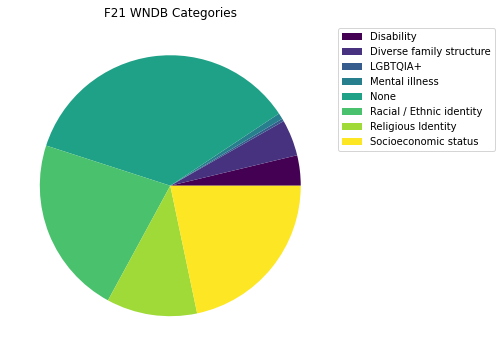

In [ ]:
df_diverse = pd.DataFrame({'Categories': [356.8, 426.4, 31.5, 71.6, 3390.4, 2095.2, 1066.5, 2061.0]},
                        index = ['Disability', 'Diverse family structure', 'LGBTQIA+', 'Mental illness', 'None', 'Racial / Ethnic identity', 'Religious Identity', 'Socioeconomic status'])
plot = df_diverse.plot.pie(y = 'Categories', figsize=(20, 6), title = '', legend = True, cmap = 'viridis', labeldistance = None)
plt.legend(bbox_to_anchor=(1.0,1.0))
plot.set(ylabel='', Title = 'F21 WNDB Categories')

plt.savefig('wndb.pdf')

In [ ]:
df_morph = pd.DataFrame({'F21 Morphology': [5765.4, 2655.7, 1079.3], 
                         'S20 Morphology': [3980.8, 1922.1, 1097.6], 
                         'S18 Morphology': [2837.3, 1505.3, 957.1]}, 
                        index = ['Things as they are', 'Things as they might be', 'Things as they should be'])

with PdfPages('morphology.pdf') as pdf:
    plot = df_morph.plot.pie(y='F21 Morphology', title = '', figsize=(15, 5), legend = True, cmap = 'viridis', labeldistance = None)
    plt.legend(bbox_to_anchor=(1.0,1.0))
    plot.set(ylabel='', Title = 'F21 Morphology')
    pdf.savefig()
    plt.close()

    plot = df_morph.plot.pie(y='S20 Morphology', title = '', figsize=(15, 5), legend = True, cmap = 'viridis', labeldistance = None)
    plt.legend(bbox_to_anchor=(1.0,1.0))
    plot.set(ylabel='', Title = 'S20 Morphology')
    pdf.savefig()
    plt.close()

    plot = df_morph.plot.pie(y='S18 Morphology', title = '', figsize=(15, 5), legend = True, cmap = 'viridis', labeldistance = None)
    plt.legend(bbox_to_anchor=(1.0,1.0))
    plot.set(ylabel='', Title = 'S18 Morphology')
    pdf.savefig()
    plt.close()

# plt.legend(bbox_to_anchor=(1.0,1.0))
# plt.legend(bbox_to_anchor=(1.0,1.0))
# plt.legend(bbox_to_anchor=(1.0,1.0))

# plt.gca().axis("equal")
# pie = plot.pie(df_morph, startangle=0, autopct='%1.0f%%', pctdistance=0.9, radius=1.2)
# labels=df.index.unique()
# plot.subplots_adjust(left=0.0, bottom=0.1, right=0.85)



In [ ]:
df_diverse = pd.DataFrame({'Categories': [5765.4, 2655.7, 1079.3], 
                         'S20 Morphology': [3980.8, 1922.1, 1097.6], 
                         'S18 Morphology': [2837.3, 1505.3, 957.1]}, 
                        index = ['Disability', 'Things as they might be', 'Things as they should be'])

plot = df_morph.plot.pie(subplots=True, figsize=(15, 2), title = 'Hey', legend = True, cmap = 'viridis', labeldistance = None)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

# Using pandas
with PdfPages('religion.pdf') as pdf:

    df.plot.scatter(x = 'year', y = 'Religious identity', c='F21 MORPH MIGHT BE', colormap='viridis', xticks = ['1850', '1900', '1925', '1950', '2000'], sharex = False)
    pdf.savefig()
    plt.close()

    df.plot.scatter(x = 'year', y = 'Religious identity', c='F21 MORPH SHOULD BE', colormap='viridis', xticks = ['1850', '1900', '1925','1950', '2000'], sharex = False)
    pdf.savefig()
    plt.close()

    df.plot.scatter(x = 'year', y = 'Religious identity', c='F21 MORPH AS ARE', colormap='viridis', xticks = ['1850', '1900', '1925','1950', '2000'], sharex = False)
    pdf.savefig()
    plt.close()
    
with PdfPages('disabled.pdf') as pdf:

    df.plot.scatter(x = 'year', y = 'Disability', c='F21 MORPH MIGHT BE', colormap='viridis', xticks = ['1850', '1900', '1925', '1950', '2000'], sharex = False)
    pdf.savefig()
    plt.close()

    df.plot.scatter(x = 'year', y = 'Disability', c='F21 MORPH SHOULD BE', colormap='viridis', xticks = ['1850', '1900', '1925','1950', '2000'], sharex = False)
    pdf.savefig()
    plt.close()

    df.plot.scatter(x = 'year', y = 'Disability', c='F21 MORPH AS ARE', colormap='viridis', xticks = ['1850', '1900', '1925','1950', '2000'], sharex = False)
    pdf.savefig()
    plt.close()

with PdfPages('family.pdf') as pdf:

    df.plot.scatter(x = 'year', y = 'Diverse family structure', c='F21 MORPH MIGHT BE', colormap='viridis', xticks = ['1850', '1900', '1925', '1950', '2000'], sharex = False)
    pdf.savefig()
    plt.close()

    df.plot.scatter(x = 'year', y = 'Diverse family structure', c='F21 MORPH SHOULD BE', colormap='viridis', xticks = ['1850', '1900', '1925','1950', '2000'], sharex = False)
    pdf.savefig()
    plt.close()

    df.plot.scatter(x = 'year', y = 'Diverse family structure', c='F21 MORPH AS ARE', colormap='viridis', xticks = ['1850', '1900', '1925','1950', '2000'], sharex = False)
    pdf.savefig()
    plt.close()

with PdfPages('lgbt.pdf') as pdf:

    df.plot.scatter(x = 'year', y = 'LGBTQIA+', c='F21 MORPH MIGHT BE', colormap='viridis', xticks = ['1850', '1900', '1925', '1950', '2000'], sharex = False)
    pdf.savefig()
    plt.close()

    df.plot.scatter(x = 'year', y = 'LGBTQIA+', c='F21 MORPH SHOULD BE', colormap='viridis', xticks = ['1850', '1900', '1925','1950', '2000'], sharex = False)
    pdf.savefig()
    plt.close()

    df.plot.scatter(x = 'year', y = 'LGBTQIA+', c='F21 MORPH AS ARE', colormap='viridis', xticks = ['1850', '1900', '1925','1950', '2000'], sharex = False)
    pdf.savefig()
    plt.close()

with PdfPages('illness.pdf') as pdf:

    df.plot.scatter(x = 'year', y = 'Mental illness', c='F21 MORPH MIGHT BE', colormap='viridis', xticks = ['1850', '1900', '1925', '1950', '2000'], sharex = False)
    pdf.savefig()
    plt.close()

    df.plot.scatter(x = 'year', y = 'Mental illness', c='F21 MORPH SHOULD BE', colormap='viridis', xticks = ['1850', '1900', '1925','1950', '2000'], sharex = False)
    pdf.savefig()
    plt.close()

    df.plot.scatter(x = 'year', y = 'Mental illness', c='F21 MORPH AS ARE', colormap='viridis', xticks = ['1850', '1900', '1925','1950', '2000'], sharex = False)
    pdf.savefig()
    plt.close()

with PdfPages('none.pdf') as pdf:

    df.plot.scatter(x = 'year', y = 'None', c='F21 MORPH MIGHT BE', colormap='viridis', xticks = ['1850', '1900', '1925', '1950', '2000'], sharex = False)
    pdf.savefig()
    plt.close()

    df.plot.scatter(x = 'year', y = 'None', c='F21 MORPH SHOULD BE', colormap='viridis', xticks = ['1850', '1900', '1925','1950', '2000'], sharex = False)
    pdf.savefig()
    plt.close()

    df.plot.scatter(x = 'year', y = 'None', c='F21 MORPH AS ARE', colormap='viridis', xticks = ['1850', '1900', '1925','1950', '2000'], sharex = False)
    pdf.savefig()
    plt.close()

with PdfPages('race.pdf') as pdf:

    df.plot.scatter(x = 'year', y = 'Racial / Ethnic identity', c='F21 MORPH MIGHT BE', colormap='viridis', xticks = ['1850', '1900', '1925', '1950', '2000'], sharex = False)
    pdf.savefig()
    plt.close()

    df.plot.scatter(x = 'year', y = 'Racial / Ethnic identity', c='F21 MORPH SHOULD BE', colormap='viridis', xticks = ['1850', '1900', '1925','1950', '2000'], sharex = False)
    pdf.savefig()
    plt.close()

    df.plot.scatter(x = 'year', y = 'Racial / Ethnic identity', c='F21 MORPH AS ARE', colormap='viridis', xticks = ['1850', '1900', '1925','1950', '2000'], sharex = False)
    pdf.savefig()
    plt.close()

with PdfPages('socio.pdf') as pdf:

    df.plot.scatter(x = 'year', y = 'Socioeconomic status', c='F21 MORPH MIGHT BE', colormap='viridis', xticks = ['1850', '1900', '1925', '1950', '2000'], sharex = False)
    pdf.savefig()
    plt.close()

    df.plot.scatter(x = 'year', y = 'Socioeconomic status', c='F21 MORPH SHOULD BE', colormap='viridis', xticks = ['1850', '1900', '1925','1950', '2000'], sharex = False)
    pdf.savefig()
    plt.close()

    df.plot.scatter(x = 'year', y = 'Socioeconomic status', c='F21 MORPH AS ARE', colormap='viridis', xticks = ['1850', '1900', '1925','1950', '2000'], sharex = False)
    pdf.savefig()
    plt.close()


# Using matplotlib
# x = df['year']
# y = df['Religious identity']
# plt.scatter(x, y)

# z = np.polyfit(x, y, 1)
# p = np.poly1d(z)
# plt.plot(x,p(x),"r--")

# plt.show()

